# **Goal Based Agent**

Consider the following state-space graph . Construct the state space
tree and reach the goal state H using Breadth-First Search, Depth first
search and Depth Limited search starting from the initial state A

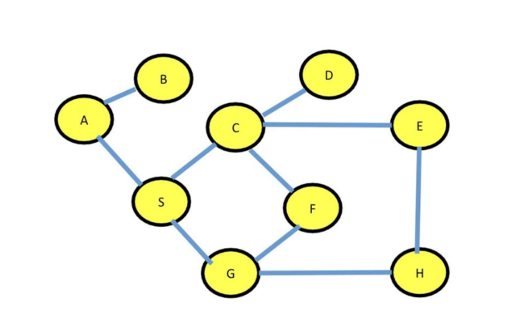

## **Modules**

In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz anytree
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
from anytree import Node, RenderTree
from networkx.drawing.nx_agraph import graphviz_layout
import re
import random
from collections import deque

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm

In [ ]:
# n = int(input("Enter no of nodes : "))
# print("Enter node and its neighbors (e.g., A->B,C) :")
# graph ={}
# for i in range(n):
#     parts = input().split('->')
#     node = parts[0].strip()
#     neighbors = set(parts[1].split(','))
#     graph[node] = neighbors
# nodes = list(graph.keys())
# nodes = input("Enter the nodes: ").split()
# n = len(nodes)

## **State Space Tree**

In [ ]:
start = input("Start node = ")

Start node = A


Graph:

{'A': {'S', 'B'},
 'B': {'A'},
 'C': {'E', 'S', 'F', 'D'},
 'D': {'C'},
 'E': {'C', 'H'},
 'F': {'G', 'C'},
 'G': {'S', 'H', 'F'},
 'H': {'G', 'E'},
 'S': {'G', 'A', 'C'}}



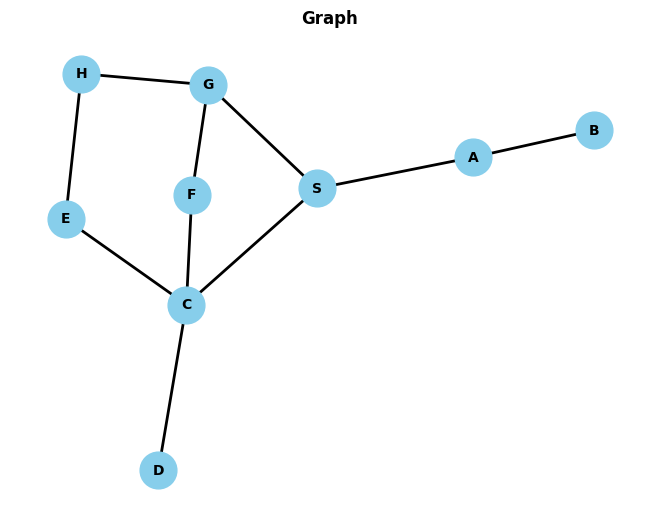

In [ ]:
graph = {
    'A': {'S', 'B'},
    'B': {'A'},
    'C': {'S', 'E', 'F', 'D'},
    'D': {'C'},
    'E': {'H', 'C'},
    'F': {'G', 'C'},
    'G': {'S', 'H', 'F'},
    'H': {'E', 'G'},
    'S': {'A', 'G', 'C'}
}

nodes = list(graph.keys())
n = len(nodes)

print("Graph:\n")
pprint(graph)
print()

G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold',width=2.0)
plt.title("Graph", fontweight='bold')
plt.show()

In [ ]:
def simple(tree, parent=None, occurrences={}, connections={}):
    for key, value in tree.items():
        occurrences[key] = occurrences.get(key, 0) + 1
        current_node = key + str(occurrences[key])
        if parent:
            connections.setdefault(parent, set()).add(current_node)
        connections[current_node] = set()
        simple(value, current_node, occurrences, connections)
    return connections

def sort_dict(input_dict):
    return {key: sort_dict(value) if isinstance(value, dict) else value
            for key, value in sorted(input_dict.items())}

def loop(start,d):
   return {x : loop(x,d+x) for x in graph[start] if x not in d}

tree = sort_dict({start:loop(start,start)})
print("State Space Tree:\n")
pprint(tree)

State Space Tree:

{'A': {'B': {},
       'S': {'C': {'D': {},
                   'E': {'H': {'G': {'F': {}}}},
                   'F': {'G': {'H': {'E': {}}}}},
             'G': {'F': {'C': {'D': {}, 'E': {'H': {}}}},
                   'H': {'E': {'C': {'D': {}, 'F': {}}}}}}}}


In [ ]:
def build_anytree(node_value, parent=None):
    if isinstance(node_value, dict):
        for key, children in node_value.items():
            current_node = Node(key, parent=parent)
            build_anytree(children, parent=current_node)

root_node = Node(start)
build_anytree(tree[start], parent=root_node)
print("State Space Tree:\n")
for pre, fill, node in RenderTree(root_node):
    print(f"{pre}{node.name}")

State Space Tree:

A
├── B
└── S
    ├── C
    │   ├── D
    │   ├── E
    │   │   └── H
    │   │       └── G
    │   │           └── F
    │   └── F
    │       └── G
    │           └── H
    │               └── E
    └── G
        ├── F
        │   └── C
        │       ├── D
        │       └── E
        │           └── H
        └── H
            └── E
                └── C
                    ├── D
                    └── F


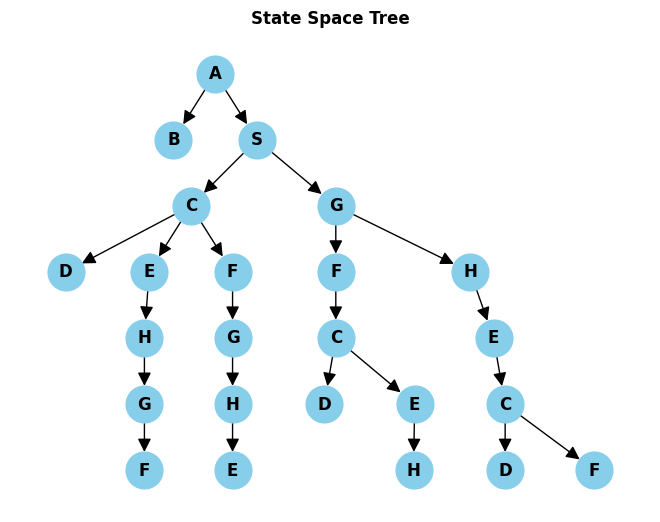

In [ ]:
def add_to_graph(graph, parent, tree_dict):
    for child, grandchildren in tree_dict.items():
        if child not in graph.nodes:
            graph.add_edge(parent, child)
            add_to_graph(graph, child, grandchildren)
        else:
            unique_child = f"{child}_{len(graph.nodes)}"
            graph.add_edge(parent, unique_child)
            add_to_graph(graph, unique_child, grandchildren)

tree_graph = nx.DiGraph()

add_to_graph(tree_graph, start, tree[start])
pos = graphviz_layout(tree_graph, prog='dot')
node_labels = {node: node.split('_')[0] if '_' in node else node for node in tree_graph.nodes}
nx.draw(tree_graph, pos, with_labels=True, labels=node_labels, font_weight='bold', node_size=700, node_color='skyblue', arrowsize=20)
plt.title("State Space Tree", fontweight='bold')
plt.show()

# **Search**

In [ ]:
target = input("Enter target = ")

Enter target = H


In [ ]:
print("Initial State =",start)
print("Goal State =",target)

Initial State = A
Goal State = H


In [ ]:
def display(name,fringe,search,path):
    if path:
        print("fringe = ", end="")
        print(*fringe)
        print(f"{name} = ", end="")
        print(*search)
        print()
        print("Connection from", start[0], "to", target, "=", "->".join(path))
    else:
        print("\nPath not found.")

## **Breadth-First Search**

In [ ]:
def bfs(graph, start, target):
    visited = set()
    queue = [(start, [start[0]])]
    while queue:
        current_vertex, path = queue.pop(0)
        fringe.append(current_vertex[0])
        if current_vertex[0] not in search:
            search.append(current_vertex[0])
        if current_vertex[0] == target:
            print("Target", target, "reached!")
            return path
        neighbors = graph[current_vertex]
        neighbors = list(neighbors)
        random.shuffle(neighbors)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor[0]]))

search = []
fringe = []
path = bfs(simple(tree), start+'1', target)
display('bfs   ',fringe,search,path)

Target H reached!
fringe = A S B C G F D E F H
bfs    = A S B C G F D E H

Connection from A to H = A->S->G->H


## **Depth-First Search**

In [ ]:
def dfs(graph, start, target, visited=set(), path=[]):
    fringe.append(start[0])
    if start[0] not in search:
        search.append(start[0])
    visited.add(start)
    path.append(start[0])
    if start[0] == target:
        print("Target", target, "reached!")
        return path
    neighbors = list(graph[start])
    random.shuffle(neighbors)
    for neighbor in neighbors:
        if neighbor not in visited:
            result = dfs(graph, neighbor, target, visited.copy(), path.copy())
            if result:
                return result

search = []
fringe = []
path = dfs(simple(tree), start+'1', target)
display('dfs   ',fringe,search,path)

Target H reached!
fringe = A S G H
dfs    = A S G H

Connection from A to H = A->S->G->H


## **Depth-Limitted Search**

In [ ]:
def dls(graph, start, target, dl, visited=set(), path=[]):
    fringe.append(start[0])
    if start[0] not in search:
        search.append(start[0])
    visited.add(start)
    path.append(start[0])
    if start[0] == target:
        print("Target", target, "reached!")
        return path
    if dl == 0:
        return
    neighbors = list(graph[start])
    random.shuffle(neighbors)
    for neighbor in neighbors:
        if neighbor not in visited:
            result = dls(graph, neighbor, target, dl - 1, visited.copy(), path.copy())
            if result:
                return result

dl = int(input("Enter limit: "))
search = []
fringe = []
path = dls(simple(tree), start+'1', target,dl)
display(f"dls({dl})",fringe,search,path)

Enter limit: 3
Target H reached!
fringe = A S G H
dls(3) = A S G H

Connection from A to H = A->S->G->H
